# Hotel Booking Demand

Dataset obtained from: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from timeit import default_timer as timer
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')

dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#children: NA -> 0
#country: NA -> 'N.A.'
#agent: NA -> 0
#company: NA -> 0

dataset.fillna({'children' : 0, 'country' : 'N. A.', 'agent' : 0, 'company' : 0}, inplace = True)

In [6]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
dataset[['children', 'country', 'agent', 'company']]

,children,country,agent,company
0,0.0,PRT,0.0,0.0
1,0.0,PRT,0.0,0.0
2,0.0,GBR,0.0,0.0
3,0.0,GBR,304.0,0.0
4,0.0,GBR,240.0,0.0
...,...,...,...,...
119385,0.0,BEL,394.0,0.0
119386,0.0,FRA,9.0,0.0
119387,0.0,DEU,9.0,0.0
119388,0.0,GBR,89.0,0.0


In [8]:
dataset.children.value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [9]:
dataset.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
MRT        1
PYF        1
SLE        1
LCA        1
Name: country, Length: 178, dtype: int64

In [10]:
dataset.agent.value_counts()

9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
294.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [11]:
dataset.company.value_counts()

0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
318.0         1
212.0         1
35.0          1
489.0         1
461.0         1
Name: company, Length: 353, dtype: int64

In [12]:
dataset.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,74.828319,10.775157,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,107.141953,53.943884,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,7.000000,0.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,152.000000,0.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


,hotel,reservations,cancelations
0,Resort Hotel,40060,11122
1,City Hotel,79330,33102


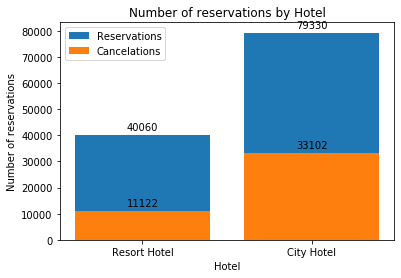

In [13]:
#number of reservations for each hotel

def auto_label(ax, container):
    for c in container:
        height = c.get_height()
        
        ax.annotate('{}'.format(height),
                    xy = (c.get_x() + c.get_width() / 2, height),
                    xytext = (0, 3),  #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

def show_number_reservations():
    dict = []
    
    for hotel in dataset.hotel.unique():
        dict.append({'hotel' : hotel, 
                     'reservations' : len(dataset.loc[dataset.hotel == hotel, 'hotel']), 
                     'cancelations' : len(dataset.loc[(dataset.hotel == hotel) & (dataset.is_canceled == 1), 'hotel'])})
    
    data = pd.DataFrame(dict)
    
    fig, ax = plt.subplots()
    
    reserv_bar = ax.bar(data.hotel, data.reservations, label = 'Reservations')
    cancel_bar = ax.bar(data.hotel, data.cancelations, label = 'Cancelations')
            
    plt.title('Number of reservations by Hotel')
    plt.xlabel('Hotel')
    plt.ylabel('Number of reservations')
    plt.legend()

    auto_label(ax, reserv_bar)
    auto_label(ax, cancel_bar)
    
    return data

show_number_reservations()

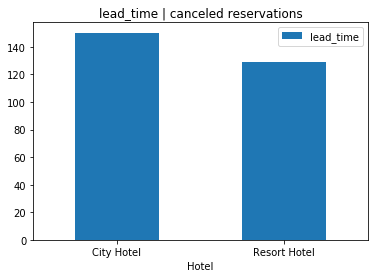

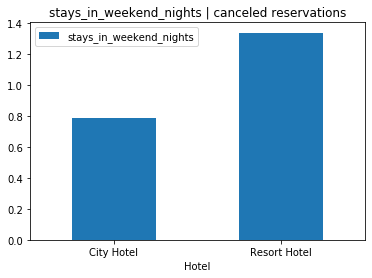

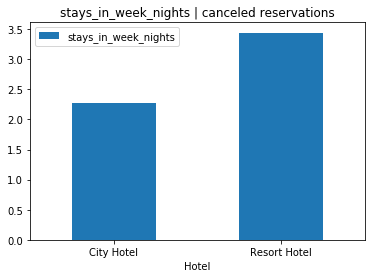

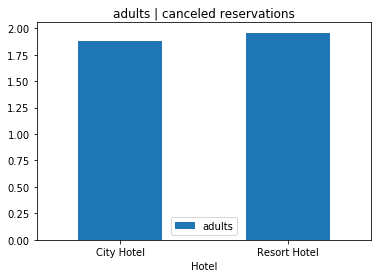

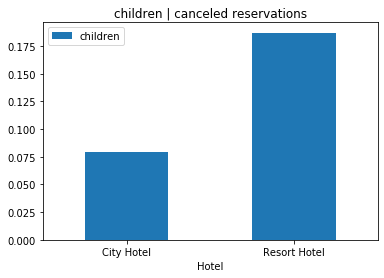

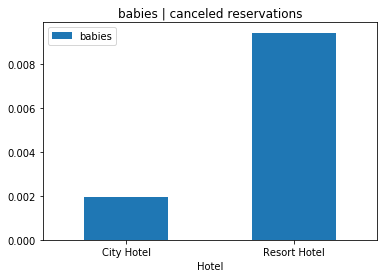

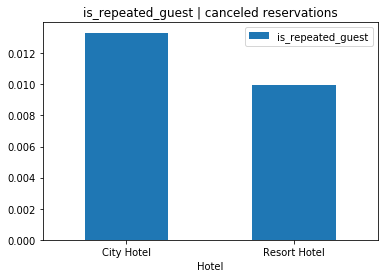

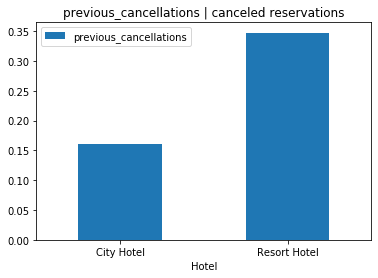

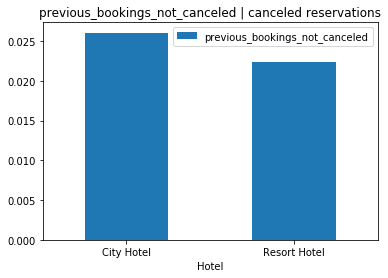

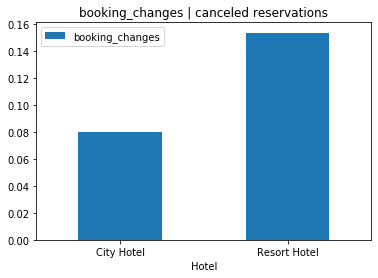

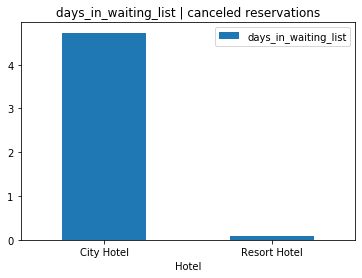

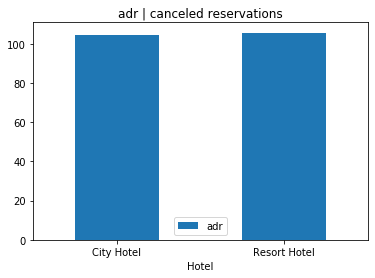

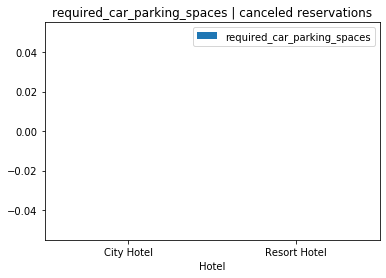

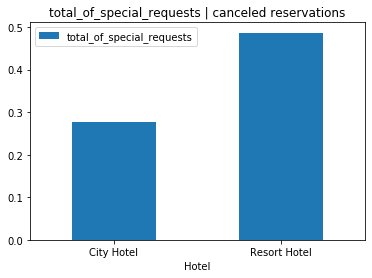

,hotel,attribute,value
0,City Hotel,lead_time,150.281222
1,Resort Hotel,lead_time,128.680543
2,City Hotel,stays_in_weekend_nights,0.787505
3,Resort Hotel,stays_in_weekend_nights,1.335281
4,City Hotel,stays_in_week_nights,2.266781
5,Resort Hotel,stays_in_week_nights,3.440299
6,City Hotel,adults,1.882907
7,Resort Hotel,adults,1.957741
8,City Hotel,children,0.079451
9,Resort Hotel,children,0.187017


In [14]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

def show_attributes(canceled, attributes):
    dict = []
    
    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]\
                      .groupby('hotel').agg(['mean']).reset_index()
        
        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'value' : data.iat[i, 1]})
    
    result = pd.DataFrame(dict)
    
    for attr in attributes:
        ax = result.loc[result.attribute == attr].plot('hotel', 'value', kind = 'bar', label = attr)
        ax.set_title(attr + (' | canceled reservations' if canceled else ''))
        ax.set_xlabel('Hotel')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'center')
        plt.show()
    
    return result

show_attributes(True, attrs)

In [15]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
         'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'agent', 'company', 'customer_type']

def list_attributes(canceled, attributes):
    dict = []

    for attr in attributes:        
        data = dataset.loc[dataset.is_canceled == (1 if canceled else 0), ['hotel', attr]]

        operation = 'count' if data.dtypes[attr] == np.object else 'mean'
            
        data = data.groupby('hotel').agg([operation]).reset_index()

        for i in range(len(dataset.hotel.unique())):
            dict.append({'hotel' : data.iat[i, 0], 'attribute' : attr, 'type': operation, 'value' : data.iat[i, 1]})

    return pd.DataFrame(dict)

list_attributes(True, attrs)

,hotel,attribute,type,value
0,City Hotel,lead_time,mean,150.281222
1,Resort Hotel,lead_time,mean,128.680543
2,City Hotel,stays_in_weekend_nights,mean,0.787505
3,Resort Hotel,stays_in_weekend_nights,mean,1.335281
4,City Hotel,stays_in_week_nights,mean,2.266781
5,Resort Hotel,stays_in_week_nights,mean,3.440299
6,City Hotel,adults,mean,1.882907
7,Resort Hotel,adults,mean,1.957741
8,City Hotel,children,mean,0.079451
9,Resort Hotel,children,mean,0.187017


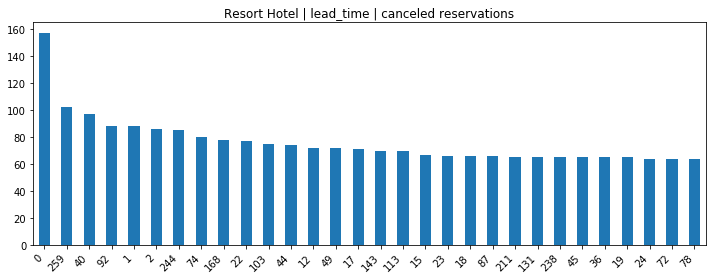

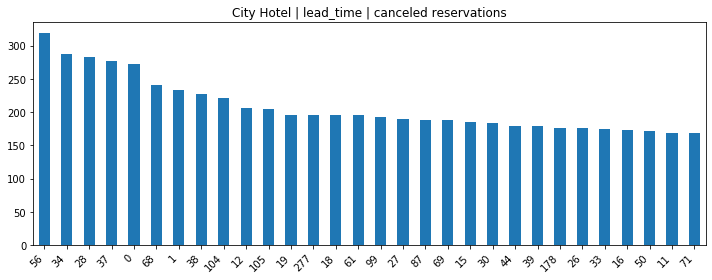

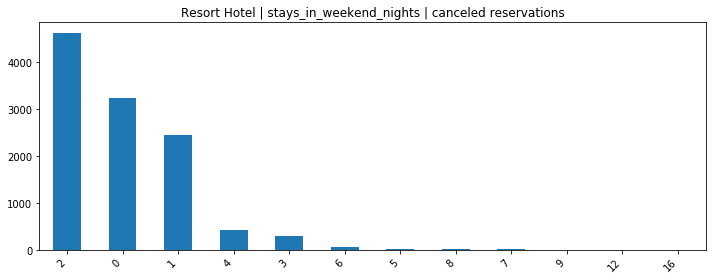

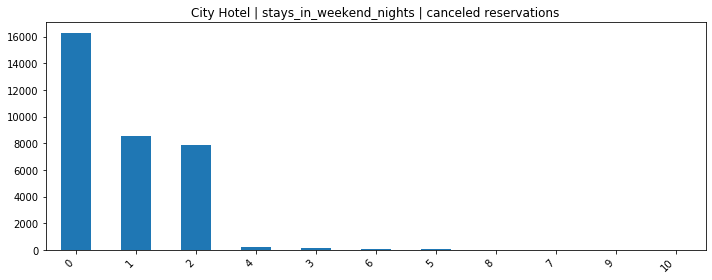

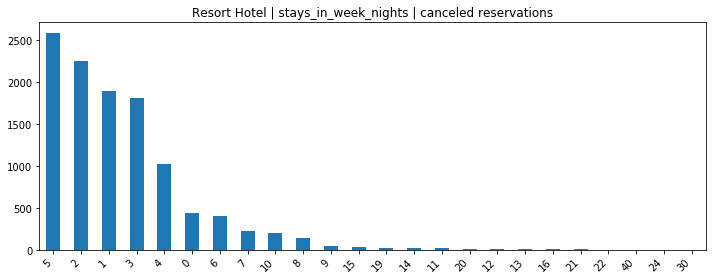

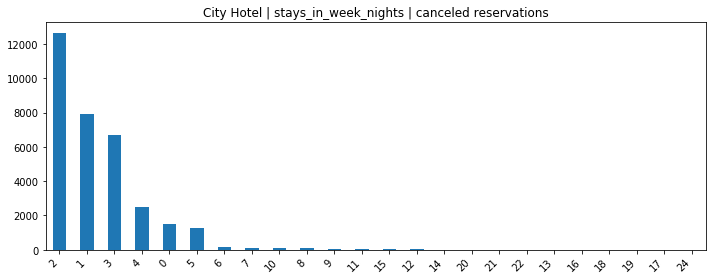

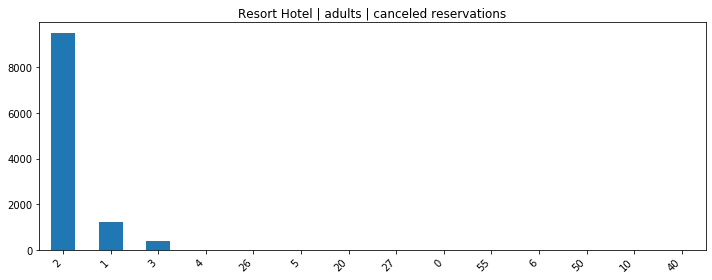

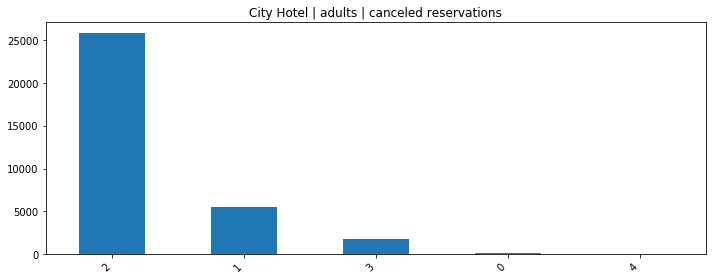

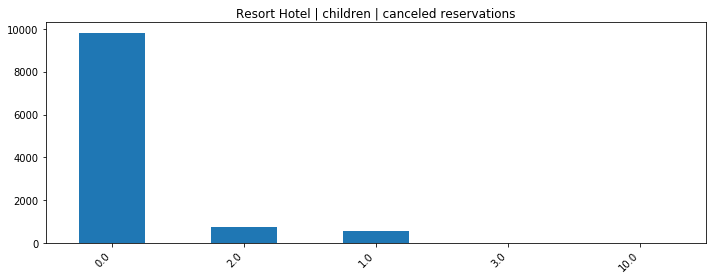

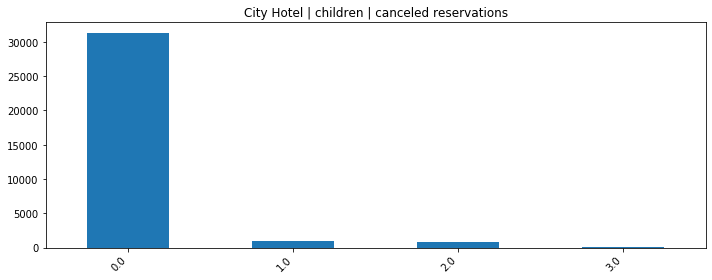

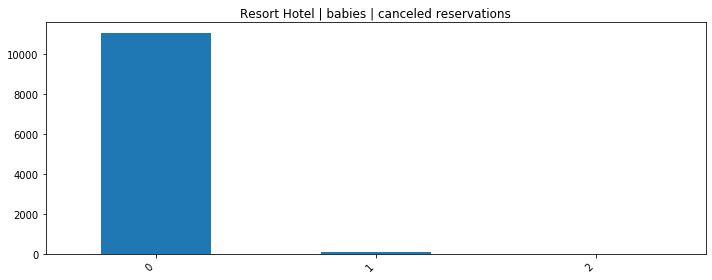

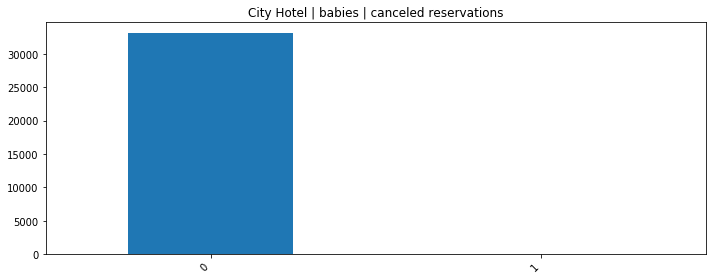

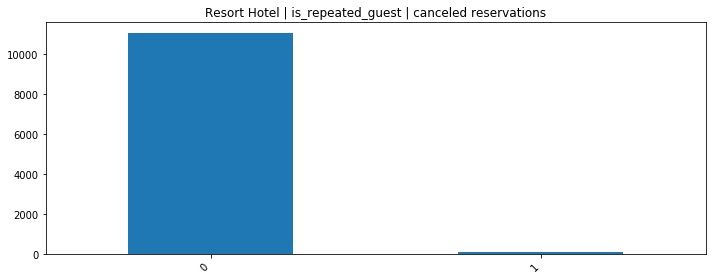

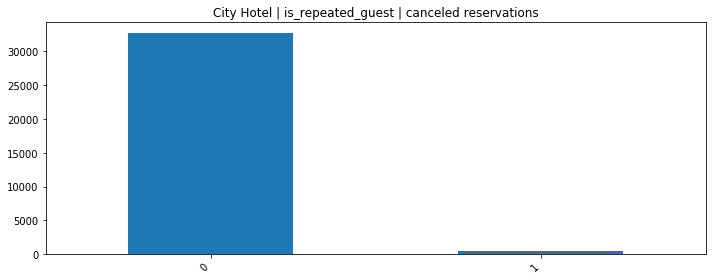

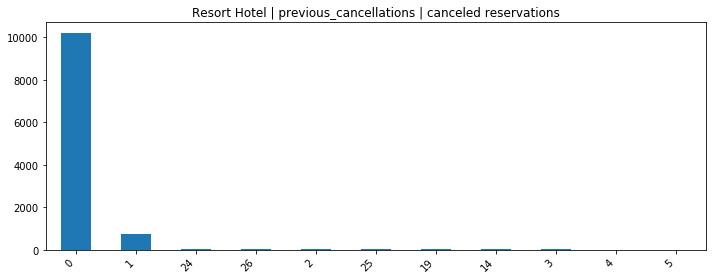

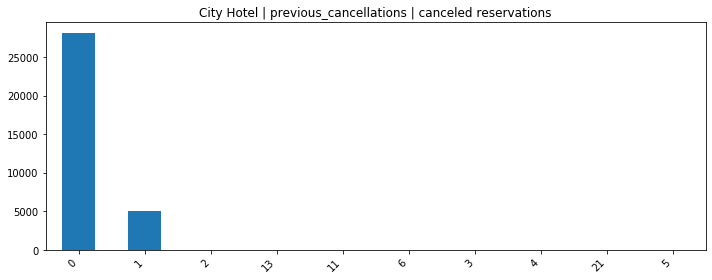

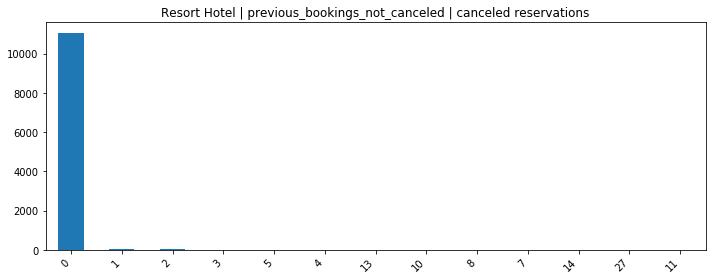

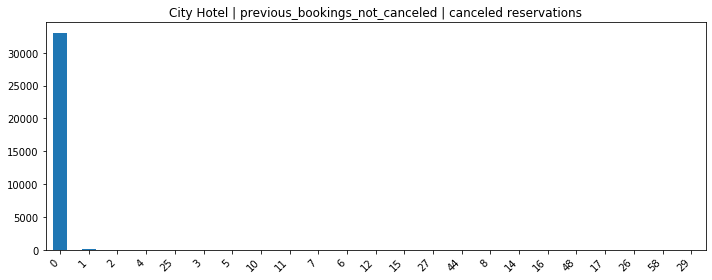

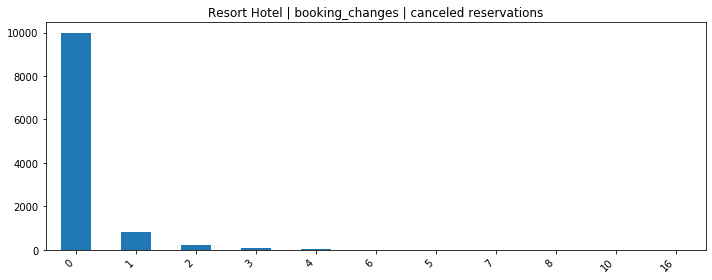

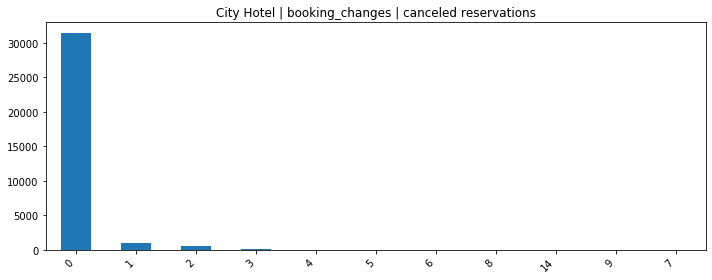

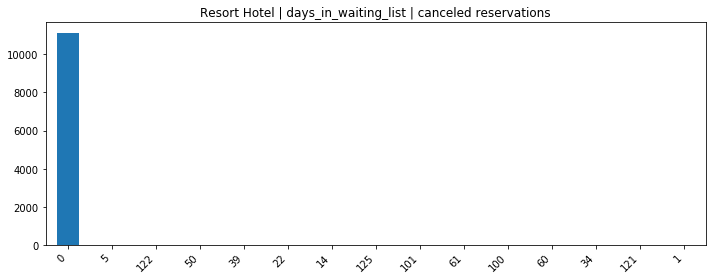

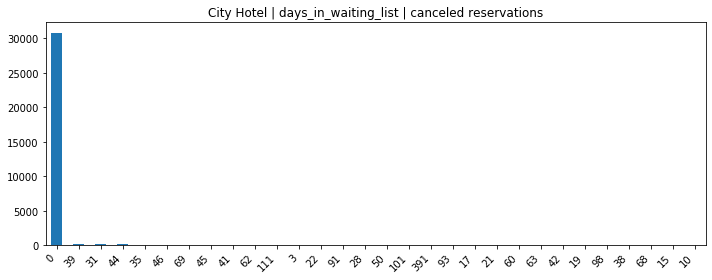

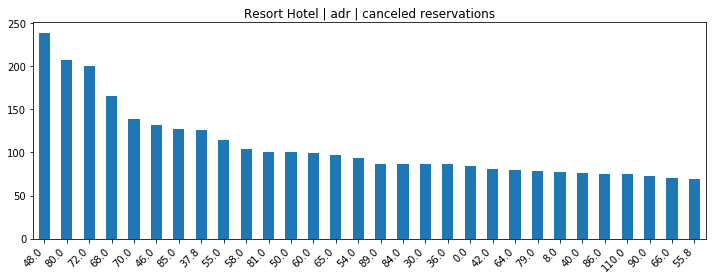

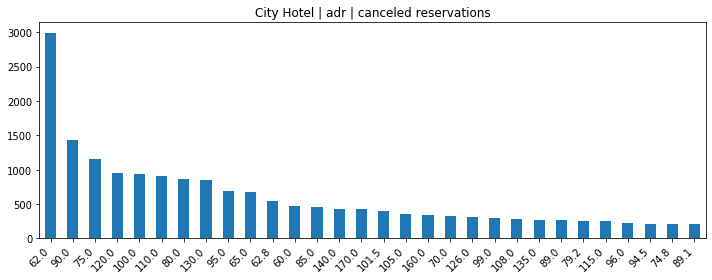

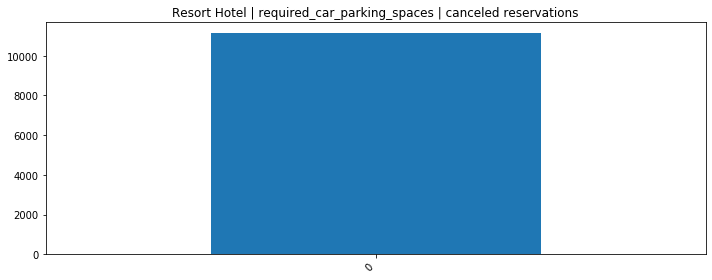

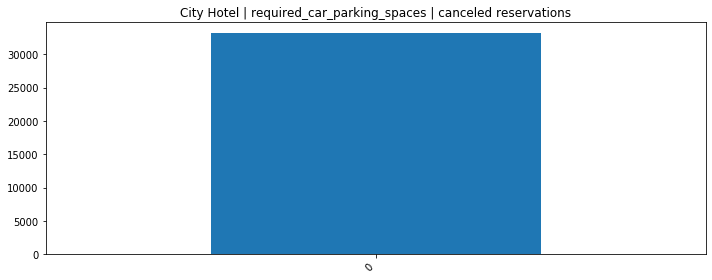

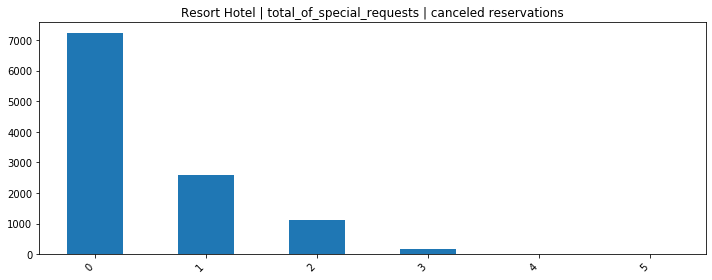

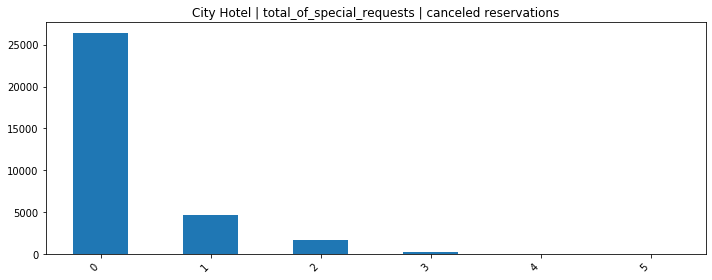

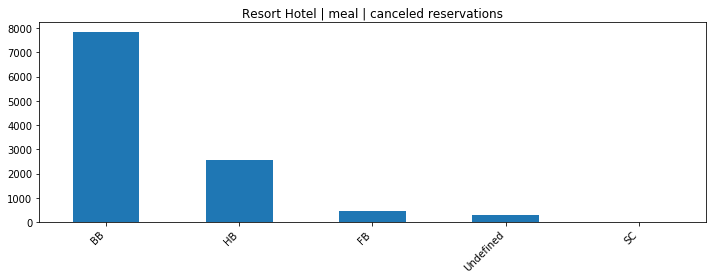

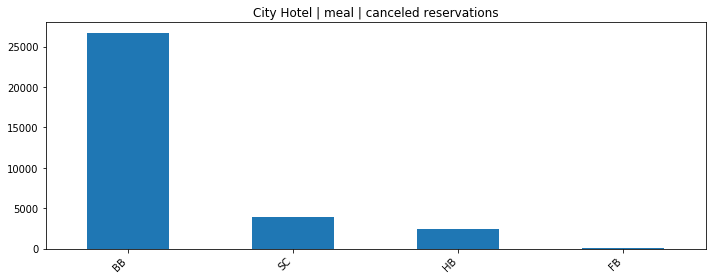

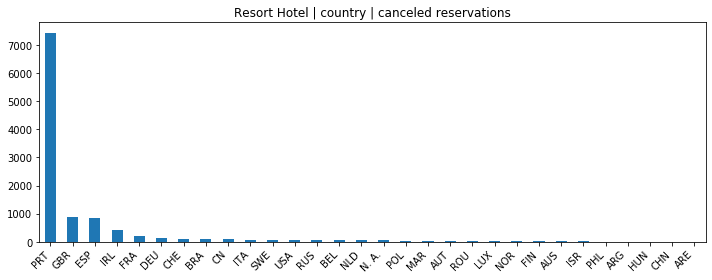

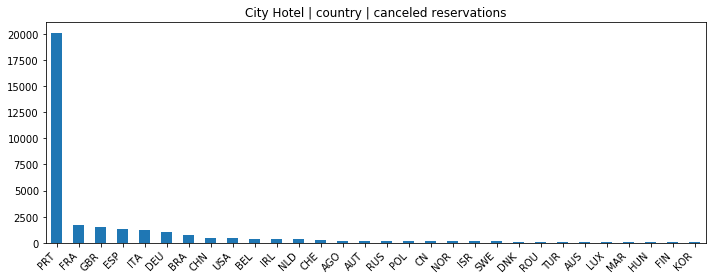

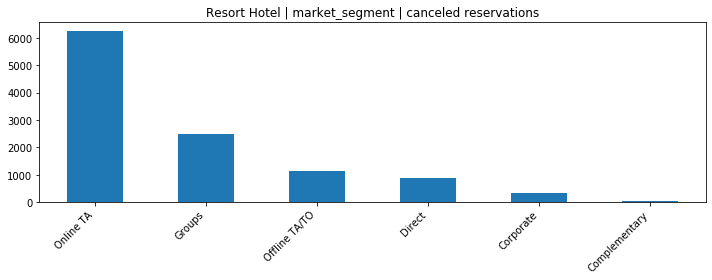

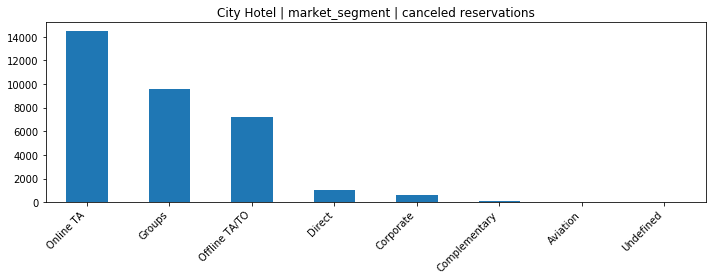

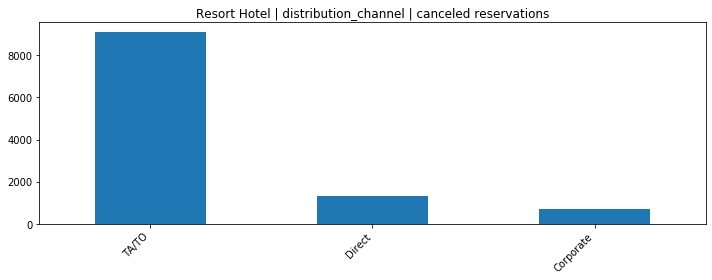

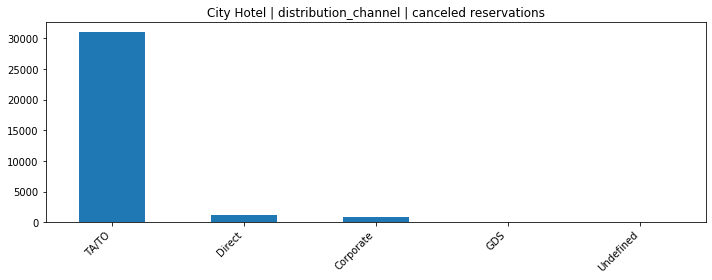

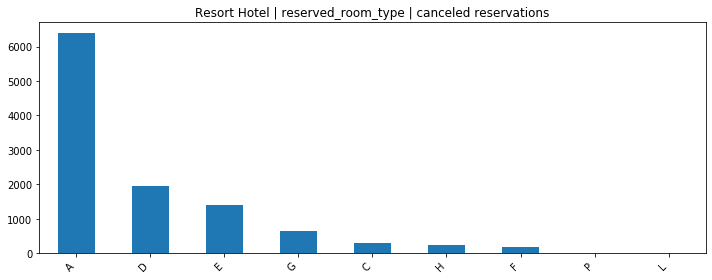

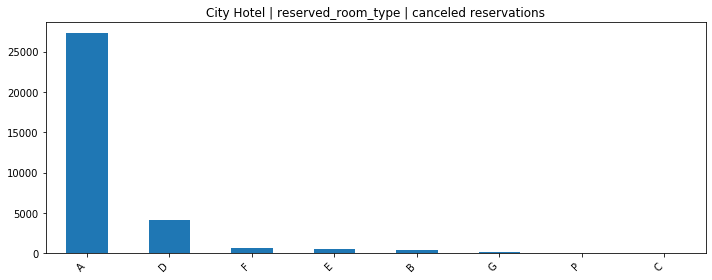

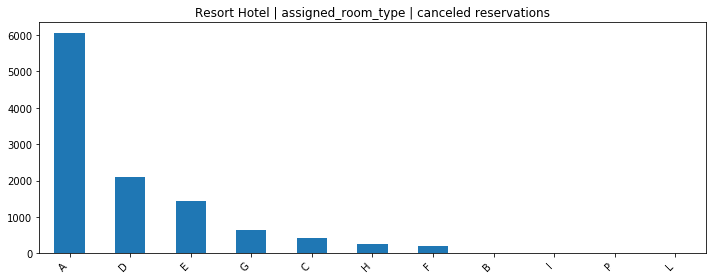

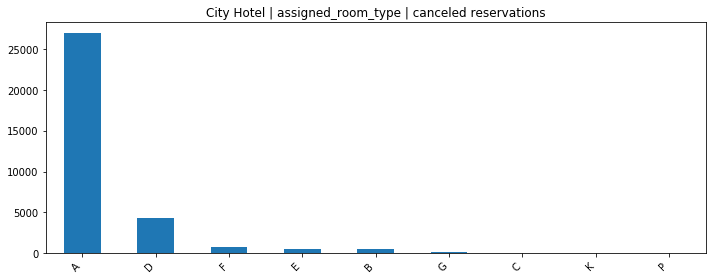

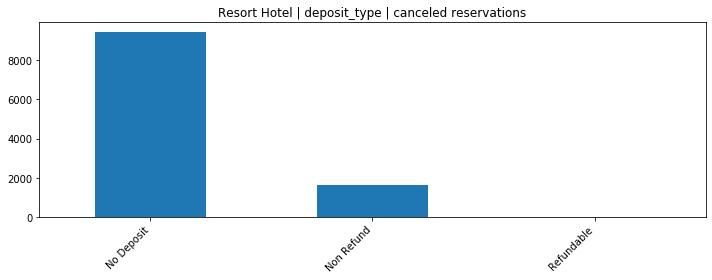

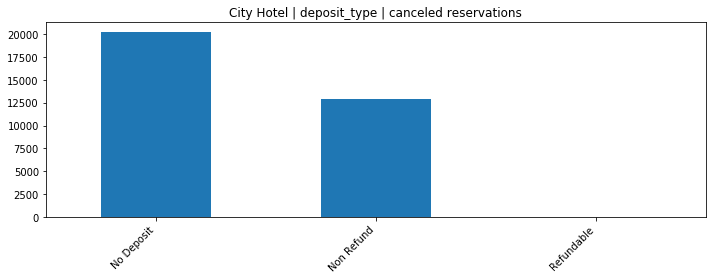

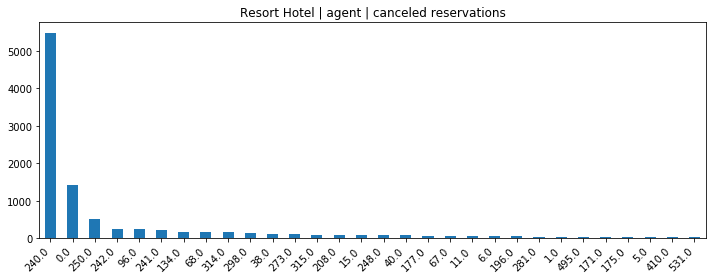

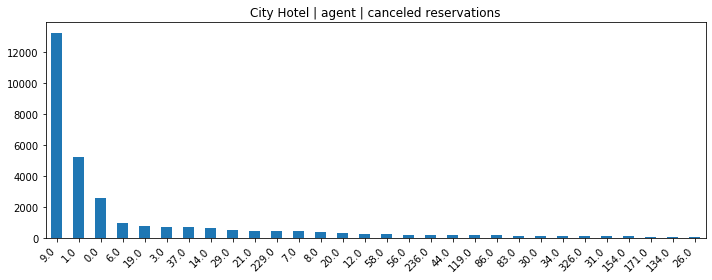

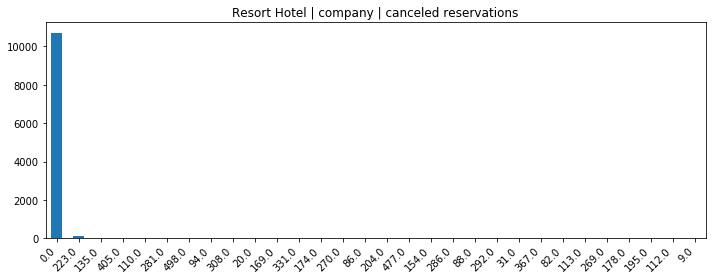

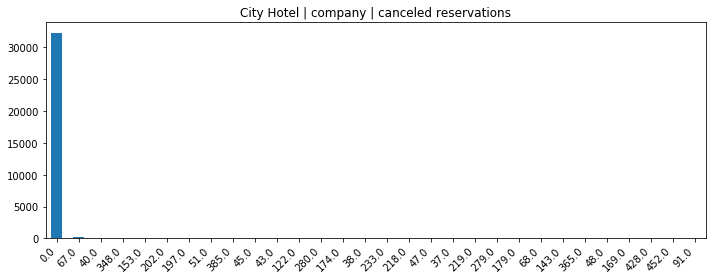

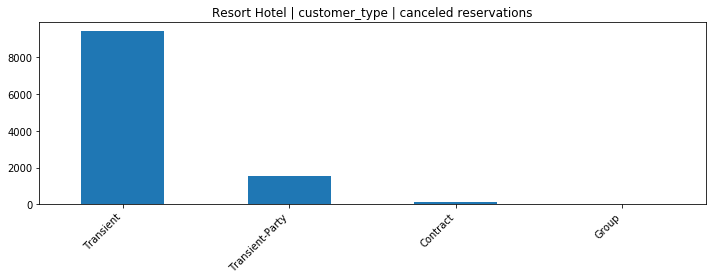

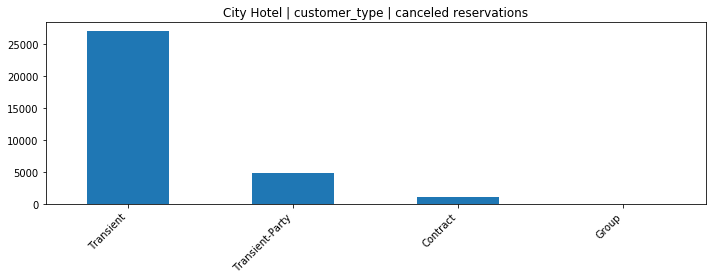

In [16]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
         'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'agent', 'company', 'customer_type']

def freq_attributes(canceled, attributes):
    hotels = dataset.hotel.unique()
        
    for attr in attributes:
        for h in hotels:            
            counts = dataset.loc[(dataset.hotel == h) & (dataset.is_canceled == (1 if canceled else 0)), attr].value_counts()
            
            plt.figure(figsize = (10, 4))
            ax = counts.head(30).plot(kind = 'bar', label = attr)
            ax.set_title(h + ' | ' + attr + (' | canceled reservations' if canceled else ''))
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
            plt.tight_layout()
            plt.show()
        
freq_attributes(True, attrs)

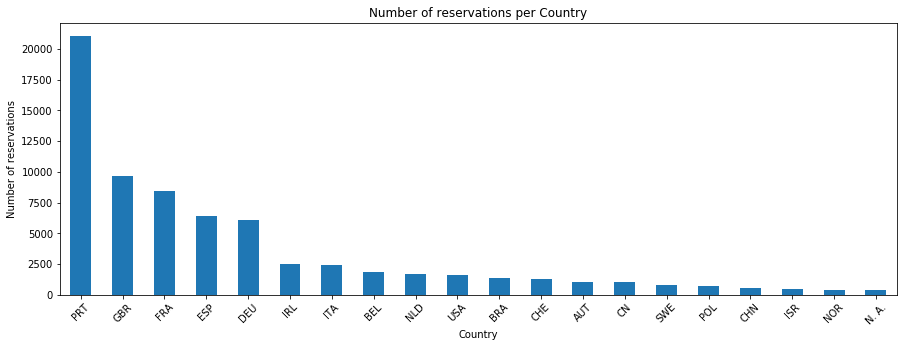

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
MRT        1
MMR        1
MLI        1
MDG        1
PLW        1
Name: country, Length: 166, dtype: int64

In [17]:
#from which countries did the guests come?
def show_countries():
    countries = dataset[dataset.is_canceled == 0].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of reservations')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.xticks(rotation = 45)
    plt.show()
    
    return countries

show_countries()

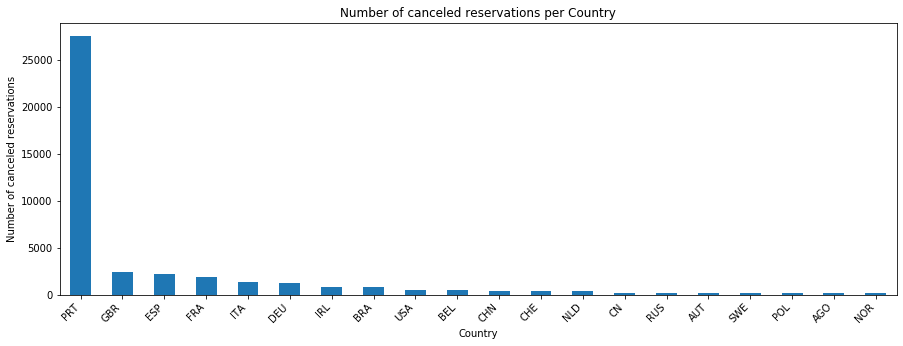

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
UMI        1
FJI        1
SYC        1
ETH        1
NIC        1
Name: country, Length: 128, dtype: int64

In [18]:
#from wich country were the guests who canceled their reservations the most?
def show_countries_canceled():
    countries = dataset[dataset.is_canceled == 1].groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number of canceled reservations per Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of canceled reservations')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    plt.show()
    
    return countries

show_countries_canceled()

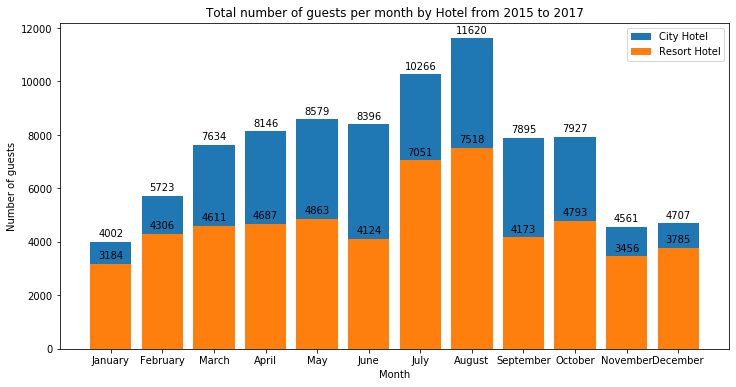

,month,hotel,guests
8,January,City Hotel,4002
9,January,Resort Hotel,3184
6,February,City Hotel,5723
7,February,Resort Hotel,4306
15,March,Resort Hotel,4611
14,March,City Hotel,7634
0,April,City Hotel,8146
1,April,Resort Hotel,4687
17,May,Resort Hotel,4863
16,May,City Hotel,8579


In [19]:
#what are the months with the most guests in each hotel?
def guests_month():
    info = ['arrival_date_month', 'hotel', 'is_canceled', 'adults', 'children', 'babies']
    guests = dataset.loc[dataset.is_canceled == 0, info]
    guests['total_guests'] = guests.adults + guests.children + guests.babies
    guests.total_guests = guests.total_guests.astype(int)
    
    guests = guests.groupby(['arrival_date_month', 'hotel']) \
                   .aggregate({'total_guests' : sum}) \
                   .reset_index()
    
    guests.columns = ['month', 'hotel', 'guests']
        
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
        
    guests.month = pd.Categorical(guests.month, categories = months, ordered = True)
    
    guests.sort_values('month', inplace = True)
    
    hotels = guests.hotel.unique()
    fig, ax = plt.subplots(figsize = (12, 6))
    bars = []
        
    for i in range(len(hotels)):
        bars.append(ax.bar(guests.loc[guests.hotel == hotels[i], 'month'], \
                           guests.loc[guests.hotel == hotels[i], 'guests'], \
                           label = hotels[i]))
        auto_label(ax, bars[i])
        
    anos = dataset.arrival_date_year.unique()
    plt.title(f'Total number of guests per month by Hotel from {min(anos)} to {max(anos)}')
    plt.xlabel('Month')
    plt.ylabel('Number of guests')
    plt.legend()
    plt.show()
    
    return guests

guests_month()

In [20]:
#what are the average prices for each person per night by hotel?
def average_daily_rate_person():
    for h in dataset.hotel.unique():
        print(f'Average daily rate per person: {dataset[dataset.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


In [21]:
#what is the average stay in days?
def average_stay_days():
    stay = dataset.loc[dataset.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()

,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


## Predicting cancelations

### Determining the most relevant variables

In [22]:
dataset.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


[Text(0.5, 0, 'is_canceled'),
 Text(1.5, 0, 'lead_time'),
 Text(2.5, 0, 'arrival_date_year'),
 Text(3.5, 0, 'arrival_date_week_number'),
 Text(4.5, 0, 'arrival_date_day_of_month'),
 Text(5.5, 0, 'stays_in_weekend_nights'),
 Text(6.5, 0, 'stays_in_week_nights'),
 Text(7.5, 0, 'adults'),
 Text(8.5, 0, 'children'),
 Text(9.5, 0, 'babies'),
 Text(10.5, 0, 'is_repeated_guest'),
 Text(11.5, 0, 'previous_cancellations'),
 Text(12.5, 0, 'previous_bookings_not_canceled'),
 Text(13.5, 0, 'booking_changes'),
 Text(14.5, 0, 'agent'),
 Text(15.5, 0, 'company'),
 Text(16.5, 0, 'days_in_waiting_list'),
 Text(17.5, 0, 'adr'),
 Text(18.5, 0, 'required_car_parking_spaces'),
 Text(19.5, 0, 'total_of_special_requests')]

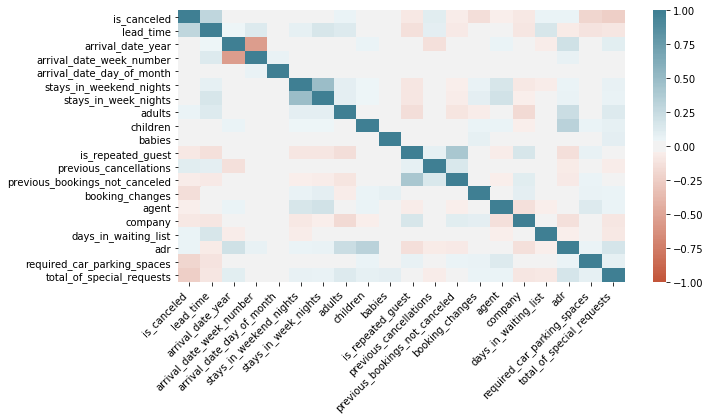

In [23]:
corr = dataset.corr()

plt.figure(figsize = (10, 5))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, 
                 cmap = sns.diverging_palette(20, 220, n = 200))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [24]:
dataset.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

The first 5 variables (lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations) will be used for building a model, since they are the ones with correlation > 0.10 for is_canceled.

In [25]:
dataset.lead_time.value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

In [26]:
dataset.groupby(['is_canceled', 'lead_time']).count()['hotel']

is_canceled  lead_time
0            0            5915
             1            3139
             2            1856
             3            1634
             4            1539
                          ... 
1            608            17
             615            17
             622            17
             626            30
             629            17
Name: hotel, Length: 887, dtype: int64

In [27]:
dataset.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [28]:
dataset.groupby(['is_canceled', 'total_of_special_requests']).agg({'hotel' : 'count'})

hotel
is_canceled total_of_special_requests       
0           0                          36762
            1                          25908
            2                          10103
            3                           2051
            4                            304
            5                             38
1           0                          33556
            1                           7318
            2                           2866
            3                            446
            4                             36
            5                              2

In [29]:
dataset.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [30]:
dataset.groupby(['is_canceled', 'required_car_parking_spaces']).agg({'hotel' : 'count'})

hotel
is_canceled required_car_parking_spaces       
0           0                            67750
            1                             7383
            2                               28
            3                                3
            8                                2
1           0                            44224

The variable 'required_car_parking_spaces' may not be decisive in determining if a reservation is canceled or not.

In [31]:
dataset.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

In [32]:
dataset.groupby(['is_canceled', 'booking_changes']).agg({'hotel' : 'count'})

hotel
is_canceled booking_changes       
0           0                59923
            1                10894
            2                 3039
            3                  783
            4                  309
            5                   98
            6                   45
            7                   28
            8                   13
            9                    7
            10                   5
            11                   2
            12                   2
            13                   5
            14                   4
            15                   3
            16                   1
            17                   2
            18                   1
            20                   1
            21                   1
1           0                41391
            1                 1807
            2                  766
            3                  144
            4                   67
            5                   20
            6                   18
            7                    3
            8                    4
            9                    1
            10                   1
            14                   1
            16                   1

In [33]:
dataset.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [34]:
dataset.groupby(['is_canceled', 'previous_cancellations']).agg({'hotel' : 'count'})

hotel
is_canceled previous_cancellations       
0           0                       74624
            1                         337
            2                          78
            3                          45
            4                          24
            5                          17
            6                          15
            11                         25
            13                          1
1           0                       38282
            1                        5714
            2                          38
            3                          20
            4                           7
            5                           2
            6                           7
            11                         10
            13                         11
            14                         14
            19                         19
            21                          1
            24                         48
            25                         25
            26                         26

### Model 1: Naive Bayes

Since the most relevant variables are already numeric, no conversions are needed.

Using the following variables, the classifier is expected to determine wether a reservation will probably be canceled or not:
* lead_time
* total_of_special_requests
* required_car_parking_spaces
* booking_changes
* previous_cancellations

In [35]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_canceled
0,342,0,0,3,0,0
1,737,0,0,4,0,0
2,7,0,0,0,0,0
3,13,0,0,0,0,0
4,14,1,0,0,0,0
...,...,...,...,...,...,...
119385,23,0,0,0,0,0
119386,102,2,0,0,0,0
119387,34,4,0,0,0,0
119388,109,0,0,0,0,0


In [36]:
model = GaussianNB()

#using KFold validation to try to increase the accuracy
def kfold_validation(dataset, variables, k, shuffle = False):
    i = 1

    kfold = KFold(n_splits = k, shuffle = shuffle)

    for i_train, i_test in kfold.split(dataset):
        data = dataset.loc[i_train, variables[:-1]]
        target = dataset.loc[i_train, variables[-1]]

        model.fit(data, target)

        data = dataset.loc[i_test, variables[:-1]]
        target = dataset.loc[i_test, variables[-1]]

        predicted = model.predict(data)

        print(53 * '-' + f'\nFold {i} | train: {len(i_train)} | test: {len(i_test)}')
        print(metrics.classification_report(target, predicted))
        print(metrics.confusion_matrix(target, predicted))

        i += 1
        
    return kfold

kfold_validation(dataset, variables, 5)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.85      0.26      0.40     12787
           1       0.53      0.95      0.68     11091

    accuracy                           0.58     23878
   macro avg       0.69      0.60      0.54     23878
weighted avg       0.70      0.58      0.53     23878

[[ 3324  9463]
 [  575 10516]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.99      0.24      0.39     20780
           1       0.16      0.98      0.28      3098

    accuracy                           0.34     23878
   macro avg       0.57      0.61      0.33     23878
weighted avg       0.88      0.34      0.37     23878

[[ 4997 15783]
 [   59  3039]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=False)

In [37]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.91      0.18      0.30     75166
           1       0.41      0.97      0.58     44224

    accuracy                           0.47    119390
   macro avg       0.66      0.57      0.44    119390
weighted avg       0.72      0.47      0.40    119390

[[13257 61909]
 [ 1381 42843]]


The Naive Bayes classifier had a bad performance. The accuracy was low in almost all folds. Although recall for canceled reservations was high, the precision was low. The classifier can detect most of the real cancelations, but wrongly classifies a great number of valid reservations as canceled.

### Model 2: Naive Bayes + new set of variables

Since using the 5 most correlated variables didn't produce good results, we'll try to use a better set of variables. Of the 5 used variables, required_car_parking_spaces is the only one which has just one value for all canceled reservations. The other variables have more values for both canceled and valid reservations. Let's try to use just the other 4 variables.

Using the following variables, the classifier is expected to determine wether a reservation will probably be canceled or not:
* lead_time
* total_of_special_requests
* booking_changes
* previous_cancellations

In [38]:
variables = ['lead_time', 'total_of_special_requests',
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables]

,lead_time,total_of_special_requests,booking_changes,previous_cancellations,is_canceled
0,342,0,3,0,0
1,737,0,4,0,0
2,7,0,0,0,0
3,13,0,0,0,0
4,14,1,0,0,0
...,...,...,...,...,...
119385,23,0,0,0,0
119386,102,2,0,0,0
119387,34,4,0,0,0
119388,109,0,0,0,0


In [39]:
model = GaussianNB()

kfold_validation(dataset, variables, 5)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.59      0.90      0.71     12787
           1       0.71      0.29      0.41     11091

    accuracy                           0.61     23878
   macro avg       0.65      0.59      0.56     23878
weighted avg       0.65      0.61      0.57     23878

[[11485  1302]
 [ 7893  3198]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     20780
           1       0.02      0.00      0.01      3098

    accuracy                           0.84     23878
   macro avg       0.44      0.48      0.46     23878
weighted avg       0.76      0.84      0.79     23878

[[20008   772]
 [ 3083    15]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=False)

In [40]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79     75166
           1       0.72      0.31      0.43     44224

    accuracy                           0.70    119390
   macro avg       0.71      0.62      0.61    119390
weighted avg       0.70      0.70      0.66    119390

[[69811  5355]
 [30715 13509]]


Precision and recall for valid cancelations were better than in Model 1. Unfortunately, precision and recall for canceled reservations were worse. The variable required_car_parking_spaces had a greater impact than anticipated.

### Model 3: Naive Bayes + all numeric variables

In [41]:
variables = list(dataset.select_dtypes(include = np.number).columns.values)
variables

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [42]:
temp = variables[0]
variables[0] = variables[-1]
variables[-1] = temp

variables

['total_of_special_requests',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'is_canceled']

In [43]:
dataset[variables]

,total_of_special_requests,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,is_canceled
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,1,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,2,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,0
119387,4,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,0
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [44]:
model = GaussianNB()

kfold_validation(dataset, variables, 5)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.61      0.56      0.58     12787
           1       0.54      0.59      0.56     11091

    accuracy                           0.57     23878
   macro avg       0.58      0.58      0.57     23878
weighted avg       0.58      0.57      0.57     23878

[[7147 5640]
 [4527 6564]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.99      0.25      0.40     20780
           1       0.16      0.98      0.28      3098

    accuracy                           0.35     23878
   macro avg       0.58      0.62      0.34     23878
weighted avg       0.88      0.35      0.39     23878

[[ 5263 15517]
 [   64  3034]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              prec

KFold(n_splits=5, random_state=None, shuffle=False)

In [45]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.89      0.20      0.33     75166
           1       0.41      0.96      0.58     44224

    accuracy                           0.48    119390
   macro avg       0.65      0.58      0.45    119390
weighted avg       0.71      0.48      0.42    119390

[[15173 59993]
 [ 1889 42335]]


Using all numeric variables did not produce better results than before.

### Model 4: Naive Bayes + PCA (using the 5 variables with higher correlation to is_canceled)

In [46]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables[:-1]]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,342,0,0,3,0
1,737,0,0,4,0
2,7,0,0,0,0
3,13,0,0,0,0
4,14,1,0,0,0
...,...,...,...,...,...
119385,23,0,0,0,0
119386,102,2,0,0,0
119387,34,4,0,0,0
119388,109,0,0,0,0


In [47]:
pca = PCA()

pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
transformed = pca.fit_transform(dataset[variables[:-1]])
transformed

array([[ 2.37988826e+02, -3.31190162e-01, -1.43449503e-01,
         2.79470960e+00, -6.43904207e-02],
       [ 6.32988622e+02, -7.47244135e-01,  1.55843031e-01,
         3.73990103e+00,  7.46833553e-03],
       [-9.70110030e+01,  1.86410150e-01, -6.39284836e-01,
        -1.38017501e-01, -6.75825317e-02],
       ...,
       [-7.00138575e+01, -1.01608407e+00,  3.15852761e+00,
        -6.64613478e-01, -1.53938984e-01],
       [ 4.98894406e+00,  9.87427579e-02, -5.91039764e-01,
        -1.49675840e-01, -4.20964328e-02],
       [ 1.00987474e+02, -5.73411802e-01,  1.34688821e+00,
        -4.22403368e-01, -6.46609027e-02]])

In [49]:
len(pca.components_)

5

In [50]:
sum(pca.explained_variance_ratio_[0:1])

0.9998410678413086

In [51]:
dataset_pca = pd.DataFrame(transformed)
dataset_pca.drop([1, 2, 3, 4], axis = 1, inplace = True)
dataset_pca

,0
0,237.988826
1,632.988622
2,-97.011003
3,-91.011006
4,-90.011717
...,...
119385,-81.011011
119386,-2.012473
119387,-70.013857
119388,4.988944


In [52]:
dataset_pca['is_canceled'] = dataset['is_canceled']
dataset_pca.is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [53]:
dataset_pca.columns = ['pc1', 'is_canceled']

dataset_pca

,pc1,is_canceled
0,237.988826,0
1,632.988622,0
2,-97.011003,0
3,-91.011006,0
4,-90.011717,0
...,...,...
119385,-81.011011,0
119386,-2.012473,0
119387,-70.013857,0
119388,4.988944,0


In [54]:
len(dataset) == len(dataset_pca)

True

In [55]:
print(f'dataset -> {dataset[variables].shape}\ndataset_pca -> {dataset_pca.shape}')

dataset -> (119390, 6)
dataset_pca -> (119390, 2)


In [56]:
variables = list(dataset_pca.columns)
variables

['pc1', 'is_canceled']

In [57]:
model = GaussianNB()

kfold_validation(dataset_pca, variables, 5, False)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.57      0.91      0.70     12787
           1       0.65      0.20      0.31     11091

    accuracy                           0.58     23878
   macro avg       0.61      0.55      0.50     23878
weighted avg       0.60      0.58      0.52     23878

[[11587  1200]
 [ 8877  2214]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     20780
           1       0.03      0.03      0.03      3098

    accuracy                           0.75     23878
   macro avg       0.45      0.45      0.45     23878
weighted avg       0.75      0.75      0.75     23878

[[17839  2941]
 [ 2993   105]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=False)

In [58]:
data = dataset_pca[variables[:-1]]
target = dataset_pca[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     75166
           1       0.55      0.38      0.45     44224

    accuracy                           0.66    119390
   macro avg       0.62      0.60      0.60    119390
weighted avg       0.64      0.66      0.64    119390

[[61383 13783]
 [27359 16865]]


Using highly correlated variables with PCA did not produce better results than before.

### Model 5: Naive Bayes + PCA (with all numeric variables)

In [59]:
variables = list(dataset.select_dtypes(include = np.number).columns.values)
temp = variables[0]
variables[0] = variables[-1]
variables[-1] = temp

variables

['total_of_special_requests',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'is_canceled']

In [60]:
dataset[variables]

,total_of_special_requests,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,is_canceled
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,1,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,2,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,0
119387,4,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,0
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [61]:
pca = PCA()
transformed = pca.fit_transform(dataset[variables])
transformed

array([[ 2.04711085e+02,  1.48925103e+02, -4.95636877e+01, ...,
        -1.06840276e-01,  2.47607667e-02, -3.34741988e-02],
       [ 4.40299533e+02,  4.64578094e+02, -6.04231927e+01, ...,
        -9.23243943e-02, -2.23976635e-02, -4.17033103e-02],
       [ 2.53355635e+00, -1.20349527e+02,  1.96668771e+00, ...,
        -9.21187890e-02,  5.79840883e-02, -1.18101785e-03],
       ...,
       [ 8.89381284e+00, -9.50522414e+01,  4.74281837e+01, ...,
        -7.96007939e-02,  1.65818793e-02, -3.97849188e-02],
       [-8.76539873e+00,  1.34221970e+01,  9.26449499e+00, ...,
        -6.68486349e-02,  8.90535010e-03,  6.69705362e-03],
       [ 1.11088208e+02,  4.17432326e+01,  3.90474490e+01, ...,
        -4.91053914e-02, -1.35432245e-02, -1.52256485e-02]])

In [62]:
len(pca.components_)

20

In [63]:
sum(pca.explained_variance_ratio_[0:5])

0.9907750910775407

In [64]:
dataset_pca = pd.DataFrame(transformed)
dataset_pca.drop(range(5, 20), axis = 1, inplace = True)
dataset_pca

,0,1,2,3,4
0,204.711085,148.925103,-49.563688,-77.969012,-11.076455
1,440.299533,464.578094,-60.423193,-53.491316,-22.168699
2,2.533556,-120.349527,1.966688,-36.912434,-0.744508
3,-237.398336,64.646718,-21.042638,-25.682750,1.173452
4,-186.266106,27.031255,-3.276719,-8.943952,0.984037
...,...,...,...,...,...
119385,-304.108236,125.665112,-15.953781,-4.093593,2.281358
119386,47.309352,-42.130706,83.769155,93.624864,-0.973601
119387,8.893813,-95.052241,47.428184,33.595897,0.095392
119388,-8.765399,13.422197,9.264495,-2.844440,-2.108422


In [65]:
dataset_pca['is_canceled'] = dataset.is_canceled
dataset_pca.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'is_canceled']
dataset_pca

,pc1,pc2,pc3,pc4,pc5,is_canceled
0,204.711085,148.925103,-49.563688,-77.969012,-11.076455,0
1,440.299533,464.578094,-60.423193,-53.491316,-22.168699,0
2,2.533556,-120.349527,1.966688,-36.912434,-0.744508,0
3,-237.398336,64.646718,-21.042638,-25.682750,1.173452,0
4,-186.266106,27.031255,-3.276719,-8.943952,0.984037,0
...,...,...,...,...,...,...
119385,-304.108236,125.665112,-15.953781,-4.093593,2.281358,0
119386,47.309352,-42.130706,83.769155,93.624864,-0.973601,0
119387,8.893813,-95.052241,47.428184,33.595897,0.095392,0
119388,-8.765399,13.422197,9.264495,-2.844440,-2.108422,0


In [66]:
print(f'dataset -> {dataset[variables].shape}\ndataset_pca -> {dataset_pca.shape}')

dataset -> (119390, 20)
dataset_pca -> (119390, 6)


In [67]:
variables = list(dataset_pca.columns)
variables

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'is_canceled']

In [68]:
model = GaussianNB()

kfold_validation(dataset_pca, variables, 5)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.54      0.94      0.69     12787
           1       0.58      0.09      0.16     11091

    accuracy                           0.55     23878
   macro avg       0.56      0.52      0.42     23878
weighted avg       0.56      0.55      0.44     23878

[[12049   738]
 [10068  1023]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     20780
           1       0.03      0.08      0.05      3098

    accuracy                           0.60     23878
   macro avg       0.43      0.38      0.40     23878
weighted avg       0.73      0.60      0.65     23878

[[13975  6805]
 [ 2857   241]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=False)

In [69]:
data = dataset_pca[variables[:-1]]
target = dataset_pca[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     75166
           1       0.52      0.53      0.53     44224

    accuracy                           0.65    119390
   macro avg       0.62      0.62      0.62    119390
weighted avg       0.65      0.65      0.65    119390

[[54117 21049]
 [20984 23240]]


Using all numeric variables with PCA did not produce better results than before.

### Model 6: Random Forest + 5 highly correlated variables

In [70]:
variables = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 
             'booking_changes', 'previous_cancellations', 'is_canceled']

dataset[variables[:-1]]

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,342,0,0,3,0
1,737,0,0,4,0
2,7,0,0,0,0
3,13,0,0,0,0
4,14,1,0,0,0
...,...,...,...,...,...
119385,23,0,0,0,0
119386,102,2,0,0,0
119387,34,4,0,0,0
119388,109,0,0,0,0


In [71]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 20, n_jobs = -1, 
                               random_state = 0, bootstrap = True)

kfold_validation(dataset, variables, 5, True)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     15105
           1       0.72      0.58      0.64      8773

    accuracy                           0.76     23878
   macro avg       0.75      0.72      0.73     23878
weighted avg       0.76      0.76      0.76     23878

[[13181  1924]
 [ 3725  5048]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     15086
           1       0.71      0.59      0.64      8792

    accuracy                           0.76     23878
   macro avg       0.75      0.72      0.73     23878
weighted avg       0.76      0.76      0.75     23878

[[12962  2124]
 [ 3617  5175]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=True)

In [72]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     75166
           1       0.74      0.59      0.66     44224

    accuracy                           0.77    119390
   macro avg       0.76      0.73      0.74    119390
weighted avg       0.77      0.77      0.76    119390

[[65704  9462]
 [17964 26260]]


The Random Forest classifier produced better results than any Naive Bayes run. Maybe it will produce better results if all numeric variables are used.

### Model 7: Random Forest + all numeric variables

In [73]:
variables = list(dataset.select_dtypes(include = np.number).columns.values)
temp = variables[0]
variables[0] = variables[-1]
variables[-1] = temp

variables

['total_of_special_requests',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'is_canceled']

In [74]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 20, n_jobs = -1, 
                               random_state = 0, bootstrap = True)

kfold_validation(dataset, variables, 5, True)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     14989
           1       0.87      0.72      0.79      8889

    accuracy                           0.86     23878
   macro avg       0.86      0.83      0.84     23878
weighted avg       0.86      0.86      0.85     23878

[[14055   934]
 [ 2487  6402]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     15140
           1       0.87      0.72      0.79      8738

    accuracy                           0.86     23878
   macro avg       0.86      0.83      0.84     23878
weighted avg       0.86      0.86      0.85     23878

[[14167   973]
 [ 2436  6302]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=True)

In [75]:
data = dataset[variables[:-1]]
target = dataset[variables[-1]]

predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     75166
           1       0.91      0.81      0.86     44224

    accuracy                           0.90    119390
   macro avg       0.91      0.88      0.89    119390
weighted avg       0.90      0.90      0.90    119390

[[71824  3342]
 [ 8261 35963]]


Random Forest with all numeric variables, using shuffle during CV, produces the best result so far. High precision and recall for both classes and a high overall accuracy.